<a href="https://colab.research.google.com/github/eflatlan/CNN_PID/blob/populateAll/newArc_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install h5py numpy

import os
import h5py
import numpy as np

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [4]:
#!wget https://raw.githubusercontent.com/eflatlan/CNN_PID/dev_floatmap/helper_functions.py
#from helper_functions.py import print_points, plot_mapsm

In [5]:
#@title Default title text
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import os
import h5py
import tensorflow as tf

# to check the impact of resolution in the 2d-map;
# print the difference between the filledBins vector versus the map (map is restricted by resolution)
def print_points(filled_bins_array = None, map_array = None, mip_position_array = None, resolution = 10):

    length = map_array.shape[0]
    distances_bins_list = []
    distances_map_list = []

    print(f"filled_bins_array shape = {filled_bins_array.shape}")
    print(f"map_array shape = {map_array.shape}")
    print(f"mip_position_array shape = {mip_position_array.shape}")


    for i in range (1, length):

        filled_bins = np.array(filled_bins_array[i])
        map = np.array(map_array[i, :,:])
        mip_pos = np.array(mip_position_array[i, :])

        #print(f"filled_bins shape = {filled_bins.shape}")
        #print(f"map shape = {map.shape}")
        #print(f"mip_pos shape = {mip_pos.shape}")

        _mip_position = []
        #_mip_position.append(mip_position_array[])
        distances2 = []

        distances_bins = [norm(np.array(pos) - mip_pos) for pos in filled_bins]

        distances_map = []
        for y in range(map.shape[0]):
            for x in range(map.shape[1]):
                if map[y, x] == 1:
                    point = (x, y)
                    distance = np.linalg.norm(np.array(point) - mip_pos*resolution)
                    distances_map.append(distance)



        distances_bins_list.append(distances_bins)
        distances_map_list.append(distances_map)


    # Print the distances for each element in map_data_list
    print(f"Element {i+1} distances:")
    for j, (distances_bins, distances_map) in enumerate(zip(distances_bins_list, distances_map_list)):
        print(f"  Point {j+1}: Distance bins: {distances_bins}\n, Distance map: {distances_map}")
    print()




def plot_maps(filled_bins_array=None, map_array=None, mip_position_array=None, X_momentum=None, X_refractive_index=None, X_ckov=None, percentage_to_plot=5, resolution = 10):
  """
  Args : filled_bins_array : array that holds the vectors of filled pads
         map_array : 2d  map with a determined resolution (the points in the filled_bins_array element, just restricted by the resolution)
         mip_position_array : array of the MIP {x, y} positions

         TODO : add mass_category and actual mass?
  """


  #percentage_to_plot = 0.05 / 10

  # Calculate the starting index of the samples to plot
  num_samples = map_array.shape[0]
  start_index = -num_samples

  # Create a subplot with the number of rows based on the number of samples
  fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))

  # Iterate over the samples and plot each map with information
  for i, ax in enumerate(axes):
      # Get the map and corresponding information
      map_data = map_array[start_index + i, :, :]
      #mass_category = particle_vector[start_index + i].mass_category
      ckov = X_ckov[start_index + i]
      mip_position = mip_position_array[start_index + i]
      momentum = X_momentum[start_index + i]
      refractive_index = X_refractive_index[start_index + i]

      # Plot the map
      ax.imshow(map_data, cmap='gray')



      #try :
      # Add a red dot at the MIP position
      ax.plot(mip_position[0]*resolution, mip_position[1]*resolution, 'ro')
      #Except exception as e :
      #  print("caught non mip pos ")
      # Set the title with the information
      #ax.set_title(f"Mass: {mass_category}, CKOV: {ckov}, MIP Position: {mip_position}, Momentum: {momentum},  refractive_index: {refractive_index}")
      ax.set_title(f"CKOV: {ckov}, MIP Position: {mip_position}, Momentum: {momentum},  refractive_index: {refractive_index}")

      ax.axis('off')

  # Adjust the spacing between subplots
  plt.tight_layout()

  # Show the plot
  plt.show()

In [17]:
def create_lr_scheduler(num_epochs=10, warmup_epochs=50):


    # endre warmup_epochs

    start_lr = 0 # Starting learning rate is 0 for the warm-up
    peak_lr = 0.001/(5*1.2) # was /5 # The learning rate we reach at the end of the warm-up
    end_lr = 5e-6   # The final learning rate at the end of training

    # Calculate decay rate based on peak and end learning rate
    # Notice we adjust the total number of epochs by subtracting the warm-up period
    exp_decay = -np.log(end_lr / peak_lr) / (num_epochs - warmup_epochs)

    # Warm-up followed by exponential decay
    def schedule(epoch):
        if epoch < warmup_epochs:
            return start_lr + ((peak_lr - start_lr) / (warmup_epochs - 1)) * epoch
        else:
            return peak_lr * np.exp(-exp_decay * (epoch - warmup_epochs))

    return tf.keras.callbacks.LearningRateScheduler(schedule)




def plot_lr(num_epochs = 10, history = None):
  div = num_epochs/4
  lrs = 1e-4 * (10 ** (np.arange(num_epochs)/div))
  plt.figure(figsize=(10, 7))
  plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
  plt.xlabel("Learning Rate")
  plt.ylabel("Loss")


  plt.title("Learning rate vs. loss");

!wget https://raw.githubusercontent.com/eflatlan/CNN_PID/models_sacved/helper_functions.py

!wget https://raw.githubusercontent.com/eflatlan/CNN_PID/populateAll/plot_helper_functions.py

from plot_helper_functions import plot_training_history
#from plot_helper_functions import plot_training_history#, plot_dist2mip_histograms, plot_maps


--2023-07-18 06:46:50--  https://raw.githubusercontent.com/eflatlan/CNN_PID/models_sacved/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14594 (14K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  14.25K  --.-KB/s    in 0s      

2023-07-18 06:46:50 (120 MB/s) - ‘helper_functions.py.4’ saved [14594/14594]

--2023-07-18 06:46:50--  https://raw.githubusercontent.com/eflatlan/CNN_PID/populateAll/plot_helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

In [7]:
#def plot_worst_(model, y_test, X_test_map, X_test_momentum, X_test_refractive_index, X_test_ckov, X_test_mip_position, y_pred):
def plot_maps(filled_bins_array=None, map_array=None, mip_position_array=None, X_momentum=None, X_refractive_index=None, X_ckov=None, percentage_to_plot=5, resolution = 10):
  #  print("Shape of y_pred: ", y_pred.shape)
  # 1. Predict labels on validation data
  #plot_worst(model, y_test, X_test["X_test_map"], X_test["X_test_momentum"], X_test["X_test_refractive_index"], X_test["X_test_ckov"], X_test["X_test_mip_position"], y_pred_test)

  # 2. Calculate the difference between predicted and actual labels
  losses = tf.keras.losses.categorical_crossentropy(y_test, y_pred).numpy()

  # Sort the indices of the losses from highest to lowest
  sorted_indices = np.argsort(losses)[::-1]

  # Get the indices of the worst performing 10%
  worst_10_percent_indices = sorted_indices[:int(0.1*len(sorted_indices))]

  # Create figure and axes
  num_plots = len(worst_10_percent_indices)
  #fig, axes = plt.subplots(num_plots, 1, figsize=(8, 20))
  fig, axes = plt.subplots(num_plots,figsize=(8, 20))

  # Define mass categories
  mass_categories = ["pion", "kaon", "proton"]

  # 3. Create plots for these cases, including their feature information and predicted vs actual labels
  for i, index in enumerate(worst_10_percent_indices):
      # Get the map and corresponding information
      map_data = map_array[index, :, :]
      actual_mass_category = mass_categories[np.argmax(y_test[index])]

      print(f"y_test[index] = {y_test[index]}")

      predicted_mass_category = mass_categories[np.argmax(y_pred[index])]
      ckov = X_test_ckov[index]
      mip_position = X_test_mip_position[index]
      momentum = X_test_momentum[index]
      refractive_index = X_test_refractive_index[index]

      mass_actual = momentum * np.sqrt(refractive_index**2 * np.cos(ckov)*np.cos(ckov) - 1)

      # Check if the value is NaN (invalid Cherenkov angle)
      if np.isnan(mass_actual):
          mass_actual = "Invalid"

      # Plot the map
      axes[i].imshow(map_data, cmap='gray')

      # Add a red dot at the MIP position
      axes[i].plot(mip_position[0]*resolution, mip_position[1]*resolution, 'ro')

      # Set the title with the information
      axes[i].set_title(f"Actual Mass")#: {actual_mass_category}, Predicted Mass: {predicted_mass_category},\nMass: {mass_actual}, Mass_prob = {y_pred[index]} \nCKOV: {ckov}, MIP Position: {mip_position}, \nMomentum: {momentum}, Refractive Index: {refractive_index}")
      #
      axes[i].set_title(f"Actual Mass: {actual_mass_category}, Predicted Mass: {predicted_mass_category},\nMass: {mass_actual}, Mass_prob = {y_pred[index]} \nCKOV: {ckov}, MIP Position: {mip_position}, \nMomentum: {momentum}, Refractive Index: {refractive_index}")

      #axes[i].set_title(f"Actual Mass: {actual_mass_category}, Predicted Mass: {predicted_mass_category}, Mass: {mass_actual}\nCKOV: {ckov}, MIP Position: {mip_position}, Momentum: {momentum}, Refractive Index: {refractive_index}")
      axes[i].axis('off')

      print("\n")
      print(f"  Actual Mass: {actual_mass_category}, Predicted Mass: {predicted_mass_category},\n Mass: {mass_actual}, Mass_prob = {y_pred[index]} \n CKOV: {ckov}, MIP Position: {mip_position}, \n  Momentum: {momentum}, Refractive Index: {refractive_index}")
  # Adjust the spacing between subplots
  plt.tight_layout()

  # Show the plot
  plt.show()


# Helping class and imports


In [8]:
#resolution = 4

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

import sys

print(sys.getrecursionlimit()) # Prints 1000

print_vals = False
from numpy.linalg import norm
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import precision_recall_curve, confusion_matrix

from scipy.signal import find_peaks

from __future__ import print_function
import os
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Input, Conv2D, Lambda, Flatten, Dense, concatenate, BatchNormalization, MaxPooling2D, Dropout, LeakyReLU, Masking, Embedding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt


from tensorflow.keras.callbacks import EarlyStopping

# create a callback
early_stopping = EarlyStopping(
    monitor='val_loss', # you can monitor 'val_loss' or 'val_accuracy'
    patience=100, # stop training if the monitored quantity does not improve for 50 epochs
    restore_best_weights=True, # restore model weights from the epoch with the best value
)

class Constants:
    PION_MASS = 0.1396
    KAON_MASS = 0.4937
    PROTON_MASS = 0.938

np.set_printoptions(precision=4)

@staticmethod
def calculate_mass(momentum, refractiveIndex, ckov):
    """ args : momentum, refractiveIndex, ckov
        returns : mass
    """
    mass = momentum * np.sqrt((refractiveIndex * np.cos(ckov))**2 - 1)
    return mass


class ParticleDataUtils:
    class Candidate2:
        def __init__(self, x, y, candStatus):
            self.x = x
            self.y = y
            self.candStatus = candStatus

    class ParticleInfo: # p
        def __init__(self, momentum, mass, energy, refractiveIndex, ckov, xRad, yRad, xPC, yPC, thetaP, phiP, arrayInfo, candsCombined, pion_candidates, kaon_candidates, proton_candidates):
            self.momentum = momentum # this dhould be with
            self.mass = mass    # not with
            self.energy = energy # with
            self.refractiveIndex = refractiveIndex # with
            self.ckov = ckov # not with
            self.xRad = xRad # with
            self.yRad = yRad # with
            self.xPC = xPC# with
            self.yPC = yPC# with
            self.thetaP = thetaP# with
            self.phiP = phiP# with
            self.arrayInfo = arrayInfo # do not include this to model
            self.candsCombined = candsCombined # with the field candStatus is a int that is 0..7, please make it categorical
            self.mass_category = self.infer_mass_category(mass)
            self.mip_position = [xPC, yPC]
            self.rad_position = [xRad, yRad]
            self.pion_candidates = pion_candidates # pion_candidates = [1 if (int(candStatus) & 4) == 4 else 0 for candStatus in candsCombined]
            self.kaon_candidates = kaon_candidates # = kaon_candidates [1 if (int(candStatus) & 2) == 2 else 0 for candStatus in candsCombined]
            self.proton_candidates = proton_candidates # = proton_candidates[1 if (int(candStatus) & 1) == 1 else 0 for candStatus in candsCombined]


        @staticmethod
        def infer_mass_category_from_ckov(momentum, refractiveIndex, ckov):
            mass = momentum * np.sqrt((refractiveIndex * np.cos(ckov))**2 - 1)

            mass_category = "unknown"
            if abs(mass - Constants.PION_MASS) < 1e-4:
                mass_category = "pion"
            elif abs(mass - Constants.KAON_MASS) < 1e-4:
                mass_category = "kaon"
            elif abs(mass - Constants.PROTON_MASS) < 1e-4:
                mass_category = "proton"
            if print_vals:
              print(f"\ninfer_mass_category_from_ckov :  momentum = {momentum}|  mass_calc = {mass} |  mass_category={mass_category} | refractiveIndex = {refractiveIndex} | ckov = {ckov}")
            return mass_category

        @staticmethod
        def infer_mass_category(mass):
            if abs(mass - Constants.PION_MASS) < 1e-6:
                return "pion"
            elif abs(mass - Constants.KAON_MASS) < 1e-6:
                return "kaon"
            elif abs(mass - Constants.PROTON_MASS) < 1e-6:
                return "proton"
            else:
                return "unknown"

        def __str__(self):
            if print_vals:
              return (f"ParticleInfo(momentum={self.momentum} | mass={self.mass} |  mass_category={self.mass_category} | "
                      f"refractiveIndex={self.refractiveIndex} | ckov={self.ckov} | rad_position={len(self.rad_position)}, "
                      f"mip_position={self.mip_position})")

    #  ''' def calculate_distances_to_mip(self):
    #       """Calculate Euclidean distances from all filled bins to MIP position"""
    #       filledBins_np = np.array(self.filledBins)
    #       mip_position_np = np.array(self.mip_position)

    #       distances = np.linalg.norm(filledBins_np - mip_position_np, axis=1)
    #       return distances'''


    def __init__(self, filename = "default_filename.h5", percentage_to_read = 100):
        self.filename = filename
        self.percentage_to_read = percentage_to_read
        self.particle_vector = self.load_data(filename)

        #
        self.particle_info = self.process_data(self.particle_vector, self.percentage_to_read)
        self.num_particles = len(self.particle_info)


        # new scalers to be created :
        self.momentum_scaler, self.momentum_stats = self.create_scalar_scaler("momentum")
        self.energy_scaler, self.momentum_stats = self.create_scalar_scaler("energy")
        self.phi_scaler, self.phi_stats = self.create_scalar_scaler("phiP")
        self.theta_scaler, self.theta_stats = self.create_scalar_scaler("thetaP")
        self.refractive_index_scaler, self.refractive_index_stats = self.create_scalar_scaler("refractiveIndex")

        print("Created scaler for scalars")

        # 2D
        self.mip_scaler, self.mip_stats = self.create_2D_scaler("mip_position")
        self.rad_scaler, self.rad_stats = self.create_2D_scaler("rad_position")

        # # vector of 2D
        # self.proton_scaler, self.proton_stats = self.create_vector_scaler("proton_candidates")
        # self.kaon_scaler, self.kaon_stats = self.create_vector_scaler("kaon_candidates")
        # self.pion_scaler, self.pion_stats = self.create_vector_scaler("pion_candidates")



        #self.ckov_scaler, self.ckov_stats = self.create_scaler("ckov")
        #self.distances_scaler, self.distances_stats = self.create_scaler("distances")


    def load_data(self, filename):
        drive_path = '/content/drive/MyDrive/Colab Notebooks/CERN_ML/CNN_PID/'  # Update the path to your Google Drive folder
        file_path = os.path.join(drive_path, filename)
        particle_vector = []

        print(f"load_data : reading file {filename}")
        print(f"load_data : location {drive_path}")

        with h5py.File(file_path, 'r') as file:
            #file.visititems(print_hdf5_items)
            for i, group_name in enumerate(file):
                group = file[group_name]

                # Read scalar values
                momentum = group.attrs['Momentum']
                mass = group.attrs['Mass']
                energy = group.attrs['Energy']
                refractiveIndex = group.attrs['RefractiveIndex']
                ckov = group.attrs['Ckov']

                xRad = group.attrs['xRad']
                yRad = group.attrs['yRad']
                xPC = group.attrs['xPC']
                yPC = group.attrs['yPC']

                thetaP = group.attrs['ThetaP']
                phiP = group.attrs['PhiP']

                arrayInfo = [group.attrs['ArrayInfo0'], group.attrs['ArrayInfo1'], group.attrs['ArrayInfo2'], group.attrs['ArrayInfo3']]


                candsCombined_dataset = group['candsCombined']

                candsCombined_data = candsCombined_dataset[...]
                #candsCombinedVec = [ParticleDataUtils.Candidate2(x['x'], x['y']) for x in candsCombined_data]
                # candsCombinedStatVec = [if (x['candStatus']) for x in candsCombined_data]
                #candsCombinedStatVec.to_list()

                #candsCombinedVec.to_list()

                # sett de til å være 0 hvis ikke her? vil da evt padde



                # pion_candidates =

                # pion_candidates = [[elem['x'], elem['y']] for elem in candsCombined_data if (int((elem['candStatus'])) & 4) == 4]
                # kaon_candidates = [[elem['x'], elem['y']] for elem in candsCombined_data if (int((elem['candStatus'])) & 2) == 2]
                # proton_candidates = [[elem['x'], elem['y']] for elem in candsCombined_data if (int((elem['candStatus'])) & 1) == 1]
                pion_candidates = [[elem['x'], elem['y']] if (int((elem['candStatus'])) & 4) == 4 else [0, 0] for elem in candsCombined_data]
                kaon_candidates = [[elem['x'], elem['y']] if (int((elem['candStatus'])) & 2) == 2 else [0, 0] for elem in candsCombined_data]
                proton_candidates = [[elem['x'], elem['y']] if (int((elem['candStatus'])) & 1) == 1 else [0, 0] for elem in candsCombined_data]


                #for p in pion_candidates: print(f" p = {p}")

                candsCombined = [ParticleDataUtils.Candidate2(x['x'], x['y'], x['candStatus']) for x in candsCombined_data]
                #print("candsCombined:")
                #for cand in candsCombined:
                #    print(f"x: {cand.x}, y: {cand.y}, candStatus: {cand.candStatus}")



                particle_info = ParticleDataUtils.ParticleInfo(
                    momentum, mass, energy, refractiveIndex, ckov, xRad, yRad, xPC, yPC, thetaP, phiP, arrayInfo, candsCombined, pion_candidates, kaon_candidates, proton_candidates)

                if print_vals == True:
                  print(particle_info)  # This will use the __str__() method of ParticleInfo

                particle_vector.append(particle_info)

        return particle_vector

    def process_data(self, particle_vector, percentage):

        # Calculate the number of particles based on the percentage
        num_particles = int(len(particle_vector) * (percentage / 100.0))

        # Slice the particle_vector to the desired percentage
        particle_vector = particle_vector[:num_particles]
        return particle_vector


    # TODO: add more scalers here!
    def create_scalar_scaler(self, feature):
        if feature in ["momentum", "refractiveIndex", "energy", "phiP", "thetaP"]:
            values = np.array([getattr(info, feature) for info in self.particle_info]).reshape(-1, 1)
        else:
            raise ValueError(f"Invalid feature: {feature}")

        scaler = StandardScaler()
        scaled_values = scaler.fit_transform(values)
        stats = {
            "mean": scaler.mean_[0],
            "std": scaler.scale_[0]
        }
        return scaler, stats



    def create_2D_scaler(self, feature):
        if feature in ["mip_position", "rad_position"]:
            # Get the original 2D array
            values = np.array([getattr(info, feature) for info in self.particle_info])
            # Flatten the array before fitting the scaler
            flat_values = values.flatten().reshape(-1, 1)
        else:
            raise ValueError(f"Invalid feature: {feature}")

        scaler = StandardScaler()
        # Fit the scaler on the flattened array
        scaler.fit(flat_values)
        # Transform the original 2D array using the fitted scaler
        scaled_values = scaler.transform(values.reshape(-1, 1)).reshape(values.shape)
        stats = {
            "mean": scaler.mean_[0],
            "std": scaler.scale_[0]
        }
        return scaler, stats



    def create_vector_scaler(self, feature):
        if feature in ["pion_candidates", "kaon_candidates", "proton_candidates"]:
            # Get the original 3D array of 2D points
            # Assume each element in `info.feature` is a 2D point (e.g., [x, y])
            values = np.array([getattr(info, feature) for info in self.particle_info])
            # Flatten the array to 1D before fitting the scaler
            flat_values = values.reshape(-1, 1)
        else:
            raise ValueError(f"Invalid feature: {feature}")

        scaler = StandardScaler()
        # Fit the scaler on the flattened array
        scaler.fit(flat_values)
        # Transform the flattened array using the fitted scaler and then reshape back to original 3D
        scaled_values = scaler.transform(flat_values).reshape(values.shape)
        stats = {
            "mean": scaler.mean_[0],
            "std": scaler.scale_[0]
        }
        return scaler, stats




# TODO : denne skal mulgiens fjernes helt ?
# create a map, the resolution is the "inverse"
def create_map(filledBins=None, resolution=4):
    # Add an offset to your map shape calculation to handle edge cases
    offset = 0
    map_shape = (int(144 * resolution + offset), int(160 * resolution + offset))
    map_data = np.zeros(map_shape, dtype=np.int32)
    if filledBins is not None:
        filledBins_np = np.array(filledBins)
        indices = (filledBins_np * resolution).astype(int)
        #print(f"create_map : indices shape : {np.array(indices).shape}")

        map_data[indices[:, 1], indices[:, 0]] = 1

        ind = np.where(map_data == 1)
        #print(f"create_map : ind shape : {np.array(ind).shape}")
    return map_data


1000


# Model

In [19]:

class MassClassifier:
  def __init__(self, percentage_to_read = 10, resolution = 4):
      self.model = None
      self.utils = None
      self.percentage_to_read = percentage_to_read
      self.resolution = resolution


  def load_data(self, filename):
      self.utils = ParticleDataUtils(filename, percentage_to_read = self.percentage_to_read) # specify percentage of particles to read..
      print(f"Number of particles: {self.utils.num_particles}")

  def preprocess_data(self):
      particle_info = self.utils.particle_info



      from tensorflow.keras.preprocessing.sequence import pad_sequences

      # Convert pion_candidates, kaon_candidates, proton_candidates to lists
      pion_candidates_list = [info.pion_candidates for info in particle_info]
      kaon_candidates_list = [info.kaon_candidates for info in particle_info]
      proton_candidates_list = [info.proton_candidates for info in particle_info]

      # Pad the lists to the longest vector per dimension
      X_pion_candidates = pad_sequences(pion_candidates_list, padding='post')
      X_kaon_candidates = pad_sequences(kaon_candidates_list, padding='post')
      X_proton_candidates = pad_sequences(proton_candidates_list, padding='post')

      print(f"X_proton_candidates shape {X_proton_candidates.shape}")

      # scalars
      X_momentum = np.array([info.momentum for info in particle_info])#.reshape(-1, 32, 32, 1)
      X_refractive_index = np.array([info.refractiveIndex for info in particle_info])#.reshape(-1, 32, 32, 1)

      # this should not be included? :
      X_ckov = np.array([info.ckov for info in particle_info])#.reshape(-1, 32, 32, 1) ??

      X_phi = np.array([particle.phiP for particle in particle_info])      # new
      X_theta = np.array([particle.thetaP for particle in particle_info])  # new
      X_energy = np.array([particle.energy for particle in particle_info]) # new


      # x,y pairs (2,1) :
      X_mip_position = np.array([info.mip_position for info in particle_info]) # was already
      X_rad_position = np.array([info.rad_position for info in particle_info]) # new


      # Normalize the inputs NB commented out scaling !!!
      # X_pion_candidates = self.utils.pion_scaler.transform(X_pion_candidates.reshape(-1, 1))#.reshape(-1, 32, 32, 1)
      # X_kaon_candidates = self.utils.kaon_scaler.transform(X_kaon_candidates.reshape(-1, 1))#.reshape(-1, 32, 32, 1)
      # X_proton_candidates = self.utils.proton_scaler.transform(X_proton_candidates.reshape(-1, 1))#.reshape(-1, 32, 32, 1)


      X_momentum = self.utils.momentum_scaler.transform(X_momentum.reshape(-1, 1))#.reshape(-1, 32, 32, 1)
      X_phi = self.utils.phi_scaler.transform(X_phi.reshape(-1, 1))#.reshape(-1, 32, 32, 1)
      X_theta = self.utils.theta_scaler.transform(X_theta.reshape(-1, 1))#.reshape(-1, 32, 32, 1)
      X_energy = self.utils.energy_scaler.transform(X_energy.reshape(-1, 1))#.reshape(-1, 32, 32, 1)
      X_refractive_index = self.utils.refractive_index_scaler.transform(X_refractive_index.reshape(-1, 1))#.reshape(-1, 32, 32, 1)

      #X_mip_position = self.utils.mip_scaler.transform(X_mip_position.reshape(-1, 1)).reshape(X_mip_position.shape)
      #X_rad_position = self.utils.rad_scaler.transform(X_rad_position.reshape(-1, 1)).reshape(X_rad_position.shape)

      len_proton = np.asarray(X_proton_candidates, dtype = object).shape[1]


      # Prepare the outputs
      y = np.array([info.mass_category for info in particle_info])

      # Convert the outputs to one-hot encoded vectors
      lb = LabelBinarizer()
      y = lb.fit_transform(y)

      # Split the data into train and test sets

      X_train_pion_candidates, X_test_pion_candidates, X_train_kaon_candidates, X_test_kaon_candidates, \
      X_train_proton_candidates, X_test_proton_candidates, X_train_momentum, X_test_momentum, \
      X_train_refractive_index, X_test_refractive_index, X_train_phi, X_test_phi, X_train_theta, \
      X_test_theta, X_train_energy, X_test_energy, X_train_mip_position, X_test_mip_position, \
      X_train_rad_position, X_test_rad_position, y_train, y_test = \
      train_test_split(X_pion_candidates, X_kaon_candidates, X_proton_candidates, X_momentum, X_refractive_index, \
      X_phi, X_theta, X_energy, X_mip_position, X_rad_position, y, test_size=0.2, random_state=42)


      # X_train_dist2mip, X_test_dist2mip, X_train_map, X_test_map, X_train_momentum, X_test_momentum, X_train_refractive_index, X_test_refractive_index, \
      #     X_train_ckov, X_test_ckov, X_train_mip_position, X_test_mip_position, y_train, y_test = \
      #     train_test_split(X_dist2mip, X_map, X_momentum, X_refractive_index, X_ckov, X_mip_position, y, test_size=0.2, random_state=42)

      # # Suppose X_photon_ckov_segmented is your data
      # X_train_photon_ckov_segmented, X_test_photon_ckov_segmented = \
      #     train_test_split(X_photon_ckov_segmented, test_size=0.2, random_state=42)

      X_train = {
          "X_train_momentum": X_train_momentum,
          "X_train_refractive_index": X_train_refractive_index,
          "X_train_phi": X_train_phi,
          "X_train_theta": X_train_theta,
          "X_train_energy": X_train_energy,
          "X_train_mip_position": X_train_mip_position,
          "X_train_rad_position": X_train_rad_position,
          "X_train_pion_candidates": X_train_pion_candidates,
          "X_train_kaon_candidates": X_train_kaon_candidates,
          "X_train_proton_candidates": X_train_proton_candidates
      }

      X_test = {
          "X_test_momentum": X_test_momentum,
          "X_test_refractive_index": X_test_refractive_index,
          "X_test_phi": X_test_phi,
          "X_test_theta": X_test_theta,
          "X_test_energy": X_test_energy,
          "X_test_mip_position": X_test_mip_position,
          "X_test_rad_position": X_test_rad_position,
          "X_test_pion_candidates": X_test_pion_candidates,
          "X_test_kaon_candidates": X_test_kaon_candidates,
          "X_test_proton_candidates": X_test_proton_candidates
      }



      return (X_train, X_test, y_train, y_test)



  def plot_hist(self, input_sequence_length=None, X_train=None, X_test=None, y_train=None, y_test=None):
      # Extract the new data fields
      X_train_pion_candidates = X_train["X_train_pion_candidates"]
      X_train_kaon_candidates = X_train["X_train_kaon_candidates"]
      X_train_proton_candidates = X_train["X_train_proton_candidates"]
      X_train_momentum = X_train["X_train_momentum"]
      X_train_refractive_index = X_train["X_train_refractive_index"]
      X_train_phi = X_train["X_train_phi"]
      X_train_theta = X_train["X_train_theta"]
      X_train_energy = X_train["X_train_energy"]
      X_train_mip_position = X_train["X_train_mip_position"]
      X_train_rad_position = X_train["X_train_rad_position"]

      X_test_pion_candidates = X_test["X_test_pion_candidates"]
      X_test_kaon_candidates = X_test["X_test_kaon_candidates"]
      X_test_proton_candidates = X_test["X_test_proton_candidates"]
      X_test_momentum = X_test["X_test_momentum"]
      X_test_refractive_index = X_test["X_test_refractive_index"]
      X_test_phi = X_test["X_test_phi"]
      X_test_theta = X_test["X_test_theta"]
      X_test_energy = X_test["X_test_energy"]
      X_test_mip_position = X_test["X_test_mip_position"]
      X_test_rad_position = X_test["X_test_rad_position"]

      # Convert the candidates data to numpy arrays
      pion_candidates_train = np.array(X_train_pion_candidates).astype(np.float32)
      kaon_candidates_train = np.array(X_train_kaon_candidates).astype(np.float32)
      proton_candidates_train = np.array(X_train_proton_candidates).astype(np.float32)

      pion_candidates_test = np.array(X_test_pion_candidates).astype(np.float32)
      kaon_candidates_test = np.array(X_test_kaon_candidates).astype(np.float32)
      proton_candidates_test = np.array(X_test_proton_candidates).astype(np.float32)

      # Create subplots for the histograms and 2D map
      fig, axs = plt.subplots(2, 5, figsize=(20, 10))
      fig2, axs2 = plt.subplots(1, 3, figsize=(18, 6))

      # For train data
      train_variables = [X_train_refractive_index, X_train_momentum, X_train_mip_position, X_train_phi, X_train_theta]
      train_labels = ['Train Refractive Index', 'Train Momentum', 'Train MIP Position', 'Train phi', 'Train theta']

      X_train_mip_position = (np.asarray(X_train_mip_position)).reshape(len(X_train_mip_position), 2)
      print(f"X_train_mip_position shape = {X_train_mip_position.shape}")
      for i, variable in enumerate(train_variables):
          if i < 2 or i == 3:  # For 1D data
              axs[0, i].hist(variable, edgecolor='black')
              axs[0, i].set_title(train_labels[i])
          elif i == 2:  # For 2D data
              axs2[0].scatter(X_train_mip_position[:, 0], X_train_mip_position[:, 1], marker='o', s=10)
              axs2[0].set_title('2D Map: MIP Position')
              axs2[0].set_xlabel('X position')
              axs2[0].set_ylabel('Y position')
          else:  # For 1D data
              axs[0, i-1].hist(variable, edgecolor='black')
              axs[0, i-1].set_title(train_labels[i])

      # For test data
      test_variables = [X_test_refractive_index, X_test_momentum, X_test_mip_position, X_test_phi, X_test_theta]
      test_labels = ['Test Refractive Index', 'Test Momentum', 'Test MIP Position', 'Test phiP', 'Test thetaP']

      X_test_mip_position = (np.asarray(X_test_mip_position)).reshape(len(X_test_mip_position), 2)
      print(f"X_test_mip_position shape = {X_test_mip_position.shape}")

      for i, variable in enumerate(test_variables):
          if i < 2 or i == 3:  # For 1D data
              axs[1, i].hist(variable, edgecolor='black')
              axs[1, i].set_title(test_labels[i])
          elif i == 2:  # For 2D data
              axs2[1].scatter(X_test_mip_position[:, 0], X_test_mip_position[:, 1], marker='o', s=10)
              axs2[1].set_title('2D Map: MIP Position')
              axs2[1].set_xlabel('X position')
              axs2[1].set_ylabel('Y position')
          else:  # For 1D data
              axs[1, i-1].hist(variable, edgecolor='black')
              axs[1, i-1].set_title(test_labels[i])

      plt.show()

      # Plot 2D map for one instance of pion, kaon, and proton
      pion_candidates_train = np.array(pion_candidates_train).astype(np.float32)
      kaon_candidates_train = np.array(kaon_candidates_train).astype(np.float32)
      proton_candidates_train = np.array(proton_candidates_train).astype(np.float32)

      pion_instance = pion_candidates_train[0]
      kaon_instance = kaon_candidates_train[0]
      proton_instance = proton_candidates_train[0]

      axs2[2].scatter(pion_instance[:, 0], pion_instance[:, 1], c='r', marker='o', label='Pion', s=20)
      axs2[2].scatter(kaon_instance[:, 0], kaon_instance[:, 1], c='g', marker='s', label='Kaon', s=20)
      axs2[2].scatter(proton_instance[:, 0], proton_instance[:, 1], c='b', marker='^', label='Proton', s=20)
      axs2[2].set_title('2D Map: Particle Instances')
      axs2[2].set_xlabel('X position')
      axs2[2].set_ylabel('Y position')
      axs2[2].legend()


  # TODO: to this to the new data-fields :
  def plot_hist2(self, input_sequence_length = None, X_train = None, X_test = None, y_train = None, y_test = None):
      #map_shape = (None, None, 1)  # Variable shape for the map input
      #X_train_photon_ckov_segmented shape : (1955, 3, 74)

      # create a map with resolution to be chosen, iterate over teh filledBins vector
      #X_map = np.array([create_map(filledBins = info.filledBins, resolution = self.resolution) for info in particle_info])
      #filled_bins_array = np.array([info.filledBins for info in particle_info], dtype=object)

      X_train_pion_candidates = X_train["X_train_pion_candidates"]
      X_train_kaon_candidates = X_train["X_train_kaon_candidates"]
      X_train_proton_candidates = X_train["X_train_proton_candidates"]
      X_train_momentum = X_train["X_train_momentum"]
      X_train_refractive_index = X_train["X_train_refractive_index"]
      X_train_phi = X_train["X_train_phi"]
      X_train_theta = X_train["X_train_theta"]
      X_train_energy = X_train["X_train_energy"]
      X_train_mip_position = X_train["X_train_mip_position"]
      X_train_rad_position = X_train["X_train_rad_position"]

      X_test_pion_candidates = X_test["X_test_pion_candidates"]
      X_test_kaon_candidates = X_test["X_test_kaon_candidates"]
      X_test_proton_candidates = X_test["X_test_proton_candidates"]
      X_test_momentum = X_test["X_test_momentum"]
      X_test_refractive_index = X_test["X_test_refractive_index"]
      X_test_phi = X_test["X_test_phi"]
      X_test_theta = X_test["X_test_theta"]
      X_test_energy = X_test["X_test_energy"]
      X_test_mip_position = X_test["X_test_mip_position"]
      X_test_rad_position = X_test["X_test_rad_position"]

      # Plot 2D map for one instance of pion, kaon, and proton
      pion_candidates_train = np.array(X_train_pion_candidates).astype(np.float32)
      kaon_candidates_train = np.array(X_train_kaon_candidates).astype(np.float32)
      proton_candidates_train = np.array(X_train_proton_candidates).astype(np.float32)


      # Plot 2D map for one instance of pion, kaon, and proton
      pion_candidates_test = np.array(X_test_pion_candidates).astype(np.float32)
      kaon_candidates_test = np.array(X_test_kaon_candidates).astype(np.float32)
      proton_candidates_test = np.array(X_test_proton_candidates).astype(np.float32)



      fig, axs = plt.subplots(2, 4, figsize=(20, 10))

      train_variables = [X_train_refractive_index, X_train_momentum, X_train_mip_position, X_train_phi, X_train_theta]
      train_labels = ['Train Refractive Index', 'Train Momentum', 'Train MIP Position', 'Train phi', 'Train theta']

      X_train_mip_position = (np.asarray(X_train_mip_position)).reshape(len(X_train_mip_position), 2)
      print(f"X_train_mip_position shape = {X_train_mip_position.shape}")
      for i, variable in enumerate(train_variables):
          if i < 3:  # variable.ndim == 1: # For 1D data
              axs[0, i].hist(variable, edgecolor='black')
              axs[0, i].set_title(train_labels[i])
          elif i == 3:  # For 2D data
              axs2[0].scatter(X_train_mip_position[:, 0], X_train_mip_position[:, 1], marker='o', s=10)
              axs2[0].set_title('2D Map: MIP Position')
              axs2[0].set_xlabel('X position')
              axs2[0].set_ylabel('Y position')
          else:  # For 1D data
              axs[0, i].hist(variable, edgecolor='black')
              axs[0, i].set_title(train_labels[i])

      # For test data
      test_variables = [X_test_refractive_index, X_test_momentum, X_test_mip_position, X_test_phi, X_test_theta]
      test_labels = ['Test Refractive Index', 'Test Momentum','Test MIP Position', 'Test phiP', 'Test thetaP']


      X_test_mip_position = (np.asarray(X_test_mip_position)).reshape(len(X_test_mip_position), 2)
      print(f"X_test_mip_position shape = {X_test_mip_position.shape}")

      for i, variable in enumerate(test_variables):
          if i < 3:  # variable.ndim == 1: # For 1D data
              axs[1, i].hist(variable, edgecolor='black')
              axs[1, i].set_title(test_labels[i])
          elif i == 3:  # For 2D data
              axs2[1].scatter(X_test_mip_position[:, 0], X_test_mip_position[:, 1], marker='o', s=10)
              axs2[1].set_title('2D Map: MIP Position')
              axs2[1].set_xlabel('X position')
              axs2[1].set_ylabel('Y position')
          else:  # For 1D data
              axs[1, i].hist(variable, edgecolor='black')
              axs[1, i].set_title(test_labels[i])

      plt.show()

      len_pion = np.asarray(pion_candidates_test, dtype = object).shape[1]
      len_kaon = np.asarray(kaon_candidates_test, dtype = object).shape[1]
      len_proton = np.asarray(proton_candidates_train, dtype = object).shape[1]

      # print(f" pion_candidates_test lastdim = {len_pion}")
      # print(f" kaon_candidates_train lastdim = {len_kaon}")
      # print(f" proton_candidates_train lastdim = {len_proton}")

      max_value = np.max(pion_candidates_test)

      # Find the minimum value across all dimensions
      min_value = np.min(pion_candidates_test)

      # print("pion_candidates_test Maximum value:", max_value)
      # print("pion_candidates_test Minimum value:", min_value)

      # print(f" pion_candidates_test lastdim = {np.asarray(pion_candidates_test, dtype = object).shape[1]}")
      # print(f" kaon_candidates_test lastdim = {np.asarray(kaon_candidates_test, dtype = object).shape[1]}")
      # print(f" proton_candidates_test lastdim = {np.asarray(proton_candidates_test, dtype = object).shape[1]}")




      pion_candidates_train = np.array(pion_candidates_train).astype(np.float32)
      kaon_candidates_train = np.array(kaon_candidates_train).astype(np.float32)
      proton_candidates_train = np.array(proton_candidates_train).astype(np.float32)


      x_train = np.asarray([pion_candidates_train, kaon_candidates_train, proton_candidates_train], dtype = "object")
      x_test = np.asarray([pion_candidates_test, kaon_candidates_test, proton_candidates_test], dtype = "object")


      #x_train shape = (3, 1955, 74) pion_candidates_test shape = (489, 74) proton_candidates_train_tf shape = (1955, 74)
      print(f"x_train shape = {np.asarray(x_train, dtype = object).shape}")
      print(f"pion_candidates_test shape = {np.asarray(pion_candidates_test, dtype = object).shape}")



      fig2, axs2 = plt.subplots(2, 3, figsize=(18, 12))
      strings_desc = ["pion", "kaon", "proton"]
      for i in range(3):
          axs2[0, i].hist(x_train[i, :, :],  bins=np.arange(0.05, 0.8, 0.01), edgecolor='black')
          axs2[0, i].set_title(f'Histogram for Ckov Train data: {strings_desc[i]}')
          axs2[0, i].set_xlabel('Value')
          axs2[0, i].set_ylabel('Frequency')

          axs2[1, i].hist(x_test[i, :, :],  bins=np.arange(0.05, 0.8, 0.01), edgecolor='black')
          axs2[1, i].set_title(f'Histogram for Ckov Test data: {strings_desc[i]}')
          axs2[1, i].set_xlabel('Value')
          axs2[1, i].set_ylabel('Frequency')

      plt.show()

      x_train_tf = np.asarray([pion_candidates_train, kaon_candidates_train, proton_candidates_train], dtype = object)
      x_test_tf = np.asarray([pion_candidates_test, kaon_candidates_test, proton_candidates_test], dtype = object)

      print(f"x_train_tf shape = {x_train_tf.shape}")

      fig3, axs3 = plt.subplots(2, 3, figsize=(18, 12))
      for i in range(3):
          axs3[0, i].hist(x_train_tf[i, :, :],  bins=np.arange(0.1, 0.8, 0.01), edgecolor='black')
          axs3[0, i].set_title(f'Histogram for TF : Ckov Train data: {strings_desc[i]}')
          axs3[0, i].set_xlabel('Value')
          axs3[0, i].set_ylabel('Frequency')

          axs3[1, i].hist(x_test_tf[i, :, :],  bins=np.arange(0.1, 0.8, 0.01), edgecolor='black')
          axs3[1, i].set_title(f'Histogram for TF :Ckov Test data: {strings_desc[i]}')
          axs3[1, i].set_xlabel('Value')
          axs3[1, i].set_ylabel('Frequency')

      plt.show()

      # Plot 2D map for one instance of pion, kaon, and proton
      pion_candidates_train = np.array(pion_candidates_train).astype(np.float32)
      kaon_candidates_train = np.array(kaon_candidates_train).astype(np.float32)
      proton_candidates_train = np.array(proton_candidates_train).astype(np.float32)

      pion_instance = pion_candidates_train[0]
      kaon_instance = kaon_candidates_train[0]
      proton_instance = proton_candidates_train[0]

      axs2[2].scatter(pion_instance[:, 0], pion_instance[:, 1], c='r', marker='o', label='Pion', s=20)
      axs2[2].scatter(kaon_instance[:, 0], kaon_instance[:, 1], c='g', marker='s', label='Kaon', s=20)
      axs2[2].scatter(proton_instance[:, 0], proton_instance[:, 1], c='b', marker='^', label='Proton', s=20)
      axs2[2].set_title('2D Map: Particle Instances')
      axs2[2].set_xlabel('X position')
      axs2[2].set_ylabel('Y position')
      axs2[2].legend()



  def build_model(self, input_sequence_length = None, X_train = None, X_test = None, y_train = None, y_test = None, mask = None):

      #map_shape = (None, None, 1)  # Variable shape for the map input
      #X_train_photon_ckov_segmented shape : (1955, 3, 74)

      X_train_pion_candidates = X_train["X_train_pion_candidates"]
      X_train_kaon_candidates = X_train["X_train_kaon_candidates"]
      X_train_proton_candidates = X_train["X_train_proton_candidates"]
      X_train_momentum = X_train["X_train_momentum"]
      X_train_refractive_index = X_train["X_train_refractive_index"]
      X_train_phi = X_train["X_train_phi"]
      X_train_theta = X_train["X_train_theta"]
      X_train_energy = X_train["X_train_energy"]
      X_train_mip_position = X_train["X_train_mip_position"]
      X_train_rad_position = X_train["X_train_rad_position"]

      X_test_pion_candidates = X_test["X_test_pion_candidates"]
      X_test_kaon_candidates = X_test["X_test_kaon_candidates"]
      X_test_proton_candidates = X_test["X_test_proton_candidates"]
      X_test_momentum = X_test["X_test_momentum"]
      X_test_refractive_index = X_test["X_test_refractive_index"]
      X_test_phi = X_test["X_test_phi"]
      X_test_theta = X_test["X_test_theta"]
      X_test_energy = X_test["X_test_energy"]
      X_test_mip_position = X_test["X_test_mip_position"]
      X_test_rad_position = X_test["X_test_rad_position"]

      print("Fields in the first vector of X_train:")
      print("X_train_pion_candidates shape:", X_train_pion_candidates.shape)
      print("X_train_kaon_candidates shape:", X_train_kaon_candidates.shape)
      print("X_train_proton_candidates shape:", X_train_proton_candidates.shape)
      print("X_train_momentum shape:", X_train_momentum.shape)
      print("X_train_refractive_index shape:", X_train_refractive_index.shape)
      print("X_train_phi shape:", X_train_phi.shape)
      print("X_train_theta shape:", X_train_theta.shape)
      print("X_train_energy shape:", X_train_energy.shape)
      print("X_train_mip_position shape:", X_train_mip_position.shape)
      print("X_train_rad_position shape:", X_train_rad_position.shape)

      print("\nFields in the first vector of X_test:")
      print("X_test_pion_candidates shape:", X_test_pion_candidates.shape)
      print("X_test_kaon_candidates shape:", X_test_kaon_candidates.shape)
      print("X_test_proton_candidates shape:", X_test_proton_candidates.shape)
      print("X_test_momentum shape:", X_test_momentum.shape)
      print("X_test_refractive_index shape:", X_test_refractive_index.shape)
      print("X_test_phi shape:", X_test_phi.shape)
      print("X_test_theta shape:", X_test_theta.shape)
      print("X_test_energy shape:", X_test_energy.shape)
      print("X_test_mip_position shape:", X_test_mip_position.shape)
      print("X_test_rad_position shape:", X_test_rad_position.shape)



      #fig, axs = plt.subplots(2, 4, figsize=(20, 10))

      # reshape 1D arrays to 2D :
      # X_train_mip_position = (np.asarray(X_train_mip_position)).reshape(len(X_train_mip_position), 2)
      # X_test_mip_position = (np.asarray(X_test_mip_position)).reshape(len(X_test_mip_position), 2)
      # X_train_rad_position = (np.asarray(X_train_rad_position)).reshape(len(X_train_rad_position), 2)
      # X_test_rad_position = (np.asarray(X_test_rad_position)).reshape(len(X_test_rad_position), 2)
      train_variables = [X_train_pion_candidates, X_train_kaon_candidates, X_train_proton_candidates, X_train_momentum, X_train_refractive_index, X_train_phi, X_train_theta, X_train_energy, X_train_mip_position, X_train_rad_position]
      train_labels = ['Train Pion Candidates', 'Train Kaon Candidates', 'Train Proton Candidates', 'Train Momentum', 'Train Refractive Index', 'Train Phi', 'Train Theta', 'Train Energy', 'Train MIP Position', 'Train Rad Position']

      # For test data
      test_variables = [X_test_pion_candidates, X_test_kaon_candidates, X_test_proton_candidates, X_test_momentum, X_test_refractive_index, X_test_phi, X_test_theta, X_test_energy, X_test_mip_position, X_test_rad_position]
      test_labels = ['Test Pion Candidates', 'Test Kaon Candidates', 'Test Proton Candidates', 'Test Momentum', 'Test Refractive Index', 'Test Phi', 'Test Theta', 'Test Energy', 'Test MIP Position', 'Test Rad Position']

      # TODO: evaluer hva som er best !
      # 1. sende inn X_test_cand_status_encoded, X_test_cand_pos som det er naa
      # 2. bare sende inn de som har status != 0
      # 3 splitte til pion, proton, kaon candidates og sende disse inn


      len_pion = np.asarray(X_test_pion_candidates, dtype = object).shape[1]
      len_kaon = np.asarray(X_test_kaon_candidates, dtype = object).shape[1]
      len_proton = np.asarray(X_test_proton_candidates, dtype = object).shape[1]


      pion_ip = Input(shape=(len_pion, 2), name="pion_ip")
      kaon_ip = Input(shape=(len_kaon, 2), name="kaon_ip")
      proton_ip = Input(shape=(len_proton, 2), name="proton_ip")



      # pion_ip = Input(shape=(len_pion, 2), name="pion_ip")
      # kaon_ip = Input(shape=(len_kaon, 2), name="kaon_ip")
      # proton_ip = Input(shape=(len_proton, 2), name="proton_ip")


      pion_ip_mask = Masking(mask_value=0.)(pion_ip)
      kaon_ip_mask = Masking(mask_value=0.)(kaon_ip)
      proton_ip_mask = Masking(mask_value=0.)(proton_ip)

      prev_pion = pion_ip_mask # NB change back to mask
      prev_kaon = kaon_ip_mask
      prev_proton = proton_ip_mask

      # Grid search parameters
      # Grid search parameters
      filter_sizes = [5]  # Filter sizes to test
      num_filters = [32]#[16, 32]  # Number of filters to test
      strides = [(2, 2)]#[(1, 1), (2, 2)]  # Strides to test
      pool_sizes = [(2, 2)]  # Max pooling sizes to test
      fc1_units = [64]#, 128]  # Number of units in fc1 to test
      fc2_units = [32]#, 32]  # Number of units in fc2 to test

      dropouts = [0.3, 0.35, 0.4]
      best_accuracy = 0
      best_model = None
      alphas = [0.005, 0.05, 0.1]

      l1l2_weights_mip = [
          [(0.01, 0.01, 0.01), (0.02, 0.02, 0.02), (0.03, 0.03, 0.03), (0.04, 0.04, 0.04), (0.05, 0.05, 0.05),
          (0.06, 0.06, 0.06), (0.07, 0.07, 0.07), (0.08, 0.08, 0.08), (0.09, 0.09, 0.09), (0.1, 0.1, 0.1)]
      ]
      l1l2_weights_mip = [[(w1/10, w2/10, w3/10) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_mip]

      l1l2_weights_ref_index = [
          [(0.01, 0.01, 0.01), (0.02, 0.02, 0.02), (0.03, 0.03, 0.03), (0.04, 0.04, 0.04), (0.05, 0.05, 0.05),
          (0.06, 0.06, 0.06), (0.07, 0.07, 0.07), (0.08, 0.08, 0.08), (0.09, 0.09, 0.09), (0.1, 0.1, 0.1)]
      ]
      l1l2_weights_ref_index = [[(w1/10, w2/10, w3/10) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_ref_index]


      l1l2_weights_pos = [[(w1/10, w2/10, w3/10) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_ref_index]

      l1l2_weights_hadrons = [
          [(0.1, 0.1, 0.1), (0.1, 0.1, 0.1), (0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),
         (0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),
          (0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1),(0.1, 0.1, 0.1)]
      ]
      l1l2_weights_hadrons = [[(w1/10, w2/10, w3/10) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_hadrons]

      l1l2_weights_momentum = [
          [(0.01, 0.01, 0.01), (0.02, 0.02, 0.02), (0.1, 0.1, 0.1), (0.1, 0.1, 0.1), (0.1, 0.1, 0.1),
          (0.1, 0.1, 0.1), (0.1, 0.1, 0.1), (0.1, 0.1, 0.1), (0.1, 0.1, 0.), (0.1, 0.1, 0.1)]
      ]
      l1l2_weights_momentum = [[(w1/10, w2/10, w3/10) for (w1, w2, w3) in sublist] for sublist in l1l2_weights_momentum]


      l1l2_weights_mip = [[(0.001*4, 0.001*2, 0.001*2) for _ in sublist] for sublist in l1l2_weights_mip]

      l1l2_weights_ref_index = [[(0.001*4, 0.001*2, 0.001*2) for _ in sublist] for sublist in l1l2_weights_ref_index]

      #l1l2_weights_hadrons = [[(0.001*4, 0.001*2, 0.001*2) for _ in sublist] for sublist in l1l2_weights_hadrons]

      l1l2_weights_momentum = [[(0.001*4, 0.001*2, 0.001*2) for _ in sublist] for sublist in l1l2_weights_momentum]



      # just assign very small first
      l1l2_weights_rad = [[(0.001, 0.001, 0.001) for _ in sublist] for sublist in l1l2_weights_mip]
      l1l2_weights_energy = [[(0.001, 0.001, 0.001) for _ in sublist] for sublist in l1l2_weights_mip]
      l1l2_weights_phi = [[(0.001, 0.001, 0.001) for _ in sublist] for sublist in l1l2_weights_mip]
      l1l2_weights_theta = [[(0.001, 0.001, 0.001) for _ in sublist] for sublist in l1l2_weights_mip]



      # i need help with these two :
      l1l2_weights_cand_pos = [[(0.0001, 0.0001, 0.0001) for _ in sublist] for sublist in l1l2_weights_mip]
      l1l2_weights_cand_status = [[(0.0001, 0.0001, 0.0001) for _ in sublist] for sublist in l1l2_weights_mip]


      print(f"l1l2_weights_mip shape {np.array(l1l2_weights_mip, dtype =object).shape}")



      momentum_shape = refractive_index_shape = phi_shape = theta_shape = energy_shape = (1, )

      #momentum_shape = refractive_index_shape = phi_shape = theta_shape = energy_shape = (len_proton, 1)

      energy_input = Input(shape=energy_shape, name="energy_input")
      phi_input = Input(shape=phi_shape, name="phi_shape")
      theta_input = Input(shape=theta_shape, name="theta_shape")
      momentum_input = Input(shape=momentum_shape, name="momentum_input")
      refractive_index_input = Input(shape=refractive_index_shape, name="refractive_index_input")
      mip_position_shape = rad_position_shape = (2,)
      #mip_position_shape = rad_position_shape = (len_proton, 2)

      rad_position_input = Input(shape=rad_position_shape, name="rad_position_input")
      mip_position_input = Input(shape=mip_position_shape, name="mip_position_input")

      print("mapplying inputs")

      # For training data
      train_variables = [X_train_pion_candidates, X_train_kaon_candidates, X_train_proton_candidates, X_train_energy, X_train_phi, X_train_theta, X_train_refractive_index, X_train_momentum, X_train_rad_position, X_train_mip_position]
      train_labels = ['Train Pion Candidates', 'Train Kaon Candidates', 'Train Proton Candidates', 'Train Energy', 'Train Phi', 'Train Theta', 'Train Refractive Index', 'Train Momentum', 'Train MIP Position', 'Train Rad Position']

      # For test data
      test_variables = [X_test_pion_candidates, X_test_kaon_candidates, X_test_proton_candidates, X_test_energy, X_test_phi, X_test_theta, X_test_refractive_index, X_test_momentum,  X_test_rad_position, X_test_mip_position]
      test_labels = ['Test Pion Candidates', 'Test Kaon Candidates', 'Test Proton Candidates', 'Test Energy', 'Test Phi', 'Test Theta', 'Test Refractive Index', 'Test Momentum', 'Test MIP Position', 'Test Rad Position']

      # Inputs for the model
      inputs = [pion_ip_mask, kaon_ip_mask, proton_ip_mask, energy_input, phi_input, theta_input, refractive_index_input, momentum_input, rad_position_input, mip_position_input]

      d=1
      for input_layer in inputs:
          print(f"input{d} = {input_layer}, input_shape = {input_layer.shape}")
          d = d+1


      for dropout in dropouts:
          for num_filter in num_filters:
              for stride in strides:
                  for alpha in alphas:
                      for fc1_unit in fc1_units:
                          for fc2_unit in fc2_units:
                              # check for                               #nan_count = np.isnan(pion_candidates_test).sum()

                              # print the number of nan
                              #print(f"Number of nan values in pion_candidates_test = {nan_count}")
                              # pion_ip_mask = Masking(mask_value=0.)(pion_ip)
                              # kaon_ip_mask = Masking(mask_value=0.)(kaon_ip)
                              # proton_ip_mask = Masking(mask_value=0.)(proton_ip)

                              #prev_dist2mip_layer = dist2mip_masked

                              units = [fc1_unit * i for i in [1, 2, 4, 8, 16, 32, 64, 128, 64, 32, 16, 8, 4, 2, 1, 0.5, 0.25]]
                              units = [fc1_unit * i for i in [1, 2, 4, 8, 16, 32, 16, 8, 4, 2, 1, 0.5, 0.25/4]]
                              units = [fc1_unit * i for i in [1, 2, 4, 8, 16, 8, 4, 2, 1, 0.5, 0.25]]
                              units = [fc1_unit * i for i in [1, 2, 4, 8, 16, 32, 8, 4, 2, 1, 0.5, 0.25]]

                              #units = [fc1_unit * i for i in [1]]


                              for i in range(1, len(units)):
                                  unit = int(units[i])

                                  # For pion
                                  dense_pion_i = Dense(unit, name=f"dense_pion_{i}",
                                                      kernel_regularizer=regularizers.L1L2(l1l2_weights_hadrons[0][i - 1][0], l1l2_weights_hadrons[0][i - 1][1]),
                                                      bias_regularizer=regularizers.L1(l1l2_weights_hadrons[0][i - 1][2]))(prev_pion)

                                  bn_pion_i = BatchNormalization(name=f"bn_pion_{i}")(dense_pion_i)
                                  leakyrelu_pion_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_pion_{i}")(bn_pion_i)
                                  dropout_pion_i = Dropout(dropout, name=f"dropout_pion_{i}")(leakyrelu_pion_i)
                                  prev_pion = dropout_pion_i

                                  # For kaon
                                  dense_kaon_i = Dense(unit, name=f"dense_kaon_{i}",
                                                      kernel_regularizer=regularizers.L1L2(l1l2_weights_hadrons[0][i - 1][0], l1l2_weights_hadrons[0][i - 1][1]),
                                                      bias_regularizer=regularizers.L1(l1l2_weights_hadrons[0][i - 1][2]))(prev_kaon)

                                  bn_kaon_i = BatchNormalization(name=f"bn_kaon_{i}")(dense_kaon_i)
                                  leakyrelu_kaon_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_kaon_{i}")(bn_kaon_i)
                                  dropout_kaon_i = Dropout(dropout, name=f"dropout_kaon_{i}")(leakyrelu_kaon_i)
                                  prev_kaon = dropout_kaon_i

                                  # For proton
                                  dense_proton_i = Dense(unit, name=f"dense_proton_{i}",
                                                        kernel_regularizer=regularizers.L1L2(l1l2_weights_hadrons[0][i - 1][0], l1l2_weights_hadrons[0][i - 1][1]),
                                                        bias_regularizer=regularizers.L1(l1l2_weights_hadrons[0][i - 1][2]))(prev_proton)

                                  bn_proton_i = BatchNormalization(name=f"bn_proton_{i}")(dense_proton_i)
                                  leakyrelu_proton_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_proton_{i}")(bn_proton_i)
                                  dropout_proton_i = Dropout(dropout, name=f"dropout_proton_{i}")(leakyrelu_proton_i)
                                  prev_proton = dropout_proton_i


                              #units2 = [fc1_unit * i for i in [1, 2, 4, 8, 16, 4, 2, 1, 0.5, 0.25/4]]
                              units2 = [fc1_unit * i for i in [1, 2, 4, 8, 16, 4, 2, 1, 0.5, 0.25]]
                              #units2 = [fc1_unit * i for i in [1]]

                              prev_momentum = momentum_input
                              prev_momentum = tf.identity(prev_momentum, name="prev_momentum")

                              prev_ref_index = refractive_index_input
                              prev_ref_index = tf.identity(prev_ref_index, name="prev_ref_index")

                              prev_mip = mip_position_input
                              prev_mip = tf.identity(prev_mip, name="prev_mip")

                              prev_rad = rad_position_input
                              prev_rad = tf.identity(prev_rad, name="prev_rad")

                              prev_phi = phi_input
                              prev_phi = tf.identity(prev_phi, name="prev_phi")

                              prev_theta = theta_input
                              prev_theta = tf.identity(prev_theta, name="prev_theta")

                              prev_energy = energy_input
                              prev_energy = tf.identity(prev_energy, name="prev_energy")


                              for i in range(1, len(units2)):
                                  step = int(units2[i])

                                  #### REFRACTIVE INDEX #####
                                  dense_ref_index_i = Dense(step, name=f"dense_ref_index_{i}",
                                                            kernel_regularizer=regularizers.L1L2(l1l2_weights_ref_index[0][i - 1][0], l1l2_weights_ref_index[0][i - 1][1]),
                                                            bias_regularizer=regularizers.L1(l1l2_weights_ref_index[0][i - 1][2]))(prev_ref_index)

                                  bn_ref_index_i = BatchNormalization(name=f"bn_ref_index_{i}")(dense_ref_index_i)
                                  leakyrelu_ref_index_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_ref_index_{i}")(bn_ref_index_i)
                                  dropout_ref_index_i = Dropout(dropout, name=f"dropout_ref_index_{i}")(leakyrelu_ref_index_i)

                                  #### MOMENTUM #####
                                  dense_momentum_i = Dense(step, name=f"dense_momentum_{i}",
                                                          kernel_regularizer=regularizers.L1L2(l1l2_weights_momentum[0][i - 1][0], l1l2_weights_momentum[0][i - 1][1]),
                                                          bias_regularizer=regularizers.L1(l1l2_weights_momentum[0][i - 1][2]))(prev_momentum)
                                  bn_momentum_i = BatchNormalization(name=f"bn_momentum_{i}")(dense_momentum_i)
                                  leakyrelu_momentum_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_momentum_{i}")(bn_momentum_i)
                                  dropout_momentum_i = Dropout(dropout, name=f"dropout_momentum_{i}")(leakyrelu_momentum_i)



                                  # ENERGY
                                  dense_energy_i = Dense(step, name=f"dense_energy_{i}",
                                                      kernel_regularizer=regularizers.L1L2(l1l2_weights_energy[0][i - 1][0], l1l2_weights_energy[0][i - 1][1]),
                                                      bias_regularizer=regularizers.L1(l1l2_weights_energy[0][i - 1][2]))(prev_energy)
                                  bn_energy_i = BatchNormalization(name=f"bn_energy_{i}")(dense_energy_i)
                                  leakyrelu_energy_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_energy_{i}")(bn_energy_i)
                                  dropout_energy_i = Dropout(dropout, name=f"dropout_energy_{i}")(leakyrelu_energy_i)

                                  # PHI
                                  dense_phi_i = Dense(step, name=f"dense_phi_{i}",
                                                      kernel_regularizer=regularizers.L1L2(l1l2_weights_phi[0][i - 1][0], l1l2_weights_phi[0][i - 1][1]),
                                                      bias_regularizer=regularizers.L1(l1l2_weights_phi[0][i - 1][2]))(prev_phi)
                                  bn_phi_i = BatchNormalization(name=f"bn_phi_{i}")(dense_phi_i)
                                  leakyrelu_phi_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_phi_{i}")(bn_phi_i)
                                  dropout_phi_i = Dropout(dropout, name=f"dropout_phi_{i}")(leakyrelu_phi_i)

                                  # THETA
                                  dense_theta_i = Dense(step, name=f"dense_theta_{i}",
                                                      kernel_regularizer=regularizers.L1L2(l1l2_weights_theta[0][i - 1][0], l1l2_weights_theta[0][i - 1][1]),
                                                      bias_regularizer=regularizers.L1(l1l2_weights_theta[0][i - 1][2]))(prev_theta)
                                  bn_theta_i = BatchNormalization(name=f"bn_theta_{i}")(dense_theta_i)
                                  leakyrelu_theta_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_theta_{i}")(bn_theta_i)
                                  dropout_theta_i = Dropout(dropout, name=f"dropout_theta_{i}")(leakyrelu_theta_i)

                                  # RAD_POSITION
                                  dense_rad_position_i = Dense(step, name=f"dense_rad_position_{i}",
                                                      kernel_regularizer=regularizers.L1L2(l1l2_weights_rad[0][i - 1][0], l1l2_weights_rad[0][i - 1][1]),
                                                      bias_regularizer=regularizers.L1(l1l2_weights_rad[0][i - 1][2]))(prev_rad)
                                  bn_rad_position_i = BatchNormalization(name=f"bn_rad_position_{i}")(dense_rad_position_i)
                                  leakyrelu_rad_position_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_rad_position_{i}")(bn_rad_position_i)
                                  dropout_rad_position_i = Dropout(dropout, name=f"dropout_rad_position_{i}")(leakyrelu_rad_position_i)


                                  #### MIP POS #####
                                  dense_mip_pos_i = Dense(step/2, name=f"dense_mip_pos_{i}",
                                                          kernel_regularizer=regularizers.L1L2(l1l2_weights_mip[0][i - 1][0], l1l2_weights_mip[0][i - 1][1]),
                                                          bias_regularizer=regularizers.L1(l1l2_weights_mip[0][i - 1][2]))(prev_mip)

                                  bn_mip_pos_i = BatchNormalization(name=f"bn_mip_pos_{i}")(dense_mip_pos_i)
                                  leakyrelu_mip_pos_i = LeakyReLU(alpha=alpha, name=f"leakyrelu_mip_pos_{i}")(bn_mip_pos_i)
                                  dropout_mip_pos_i = Dropout(dropout, name=f"dropout_mip_pos_{i}")(leakyrelu_mip_pos_i)


                                  prev_mip = dropout_mip_pos_i
                                  prev_rad = dropout_rad_position_i

                                  prev_momentum = dropout_momentum_i
                                  prev_ref_index = dropout_ref_index_i
                                  prev_energy = dropout_energy_i
                                  prev_phi = dropout_phi_i
                                  prev_theta = dropout_theta_i

                              epochs = 400
                              lr = create_lr_scheduler(num_epochs=epochs)

                              # concat_layers should have same ordeR :

                              print("now concat scalar 2D")



                              pre_dense_layer = tf.keras.layers.Concatenate(name="concat_scalars_2D")([prev_energy, prev_phi, prev_theta, prev_ref_index, prev_momentum, prev_rad, prev_mip])
                              # can i flatten something here to make the dimensions match? :

                              flat_pion = Flatten()(prev_pion)
                              flat_kaon = Flatten()(prev_kaon)
                              flat_proton = Flatten()(prev_proton)

                              dense_comb = Dense(16, activation='relu')(pre_dense_layer)
                              dropout_comb = Dropout(dropout)(dense_comb)

                              #for pd in pre_dense_layer:
                              #    print(f"concat_layers{d} : layer = {layer}, output_shape = {layer.shape}, layer_name = {layer.name}")

                              print("now concat all")
                              concat_layers = [flat_pion, flat_kaon, flat_proton]

                              final_concat_layer = tf.keras.layers.Concatenate(name="concat_scalars_all")(concat_layers + [pre_dense_layer])



                              d = 1
                              for layer in concat_layers:
                                  print(f"concat_layers{d} : layer = {layer}, output_shape = {layer.shape}, layer_name = {layer.name}")
                                  d = d + 1
                              print("\n")



                              # for kun å evaluere en hvis type IPs
                              #inputs, concat_layers, x_input_test, x_input_train = [], [], [], []
                              #x_input_train_ev = [pion_candidates_train_tf, kaon_candidates_train_tf, proton_candidates_train_tf, X_train["X_train_refractive_index"],X_train["X_train_momentum"], X_train["X_train_mip_position"]]
                              #x_input_test_ev = [pion_candidates_test_tf, kaon_candidates_test_tf, proton_candidates_test_tf, X_test["X_test_refractive_index"],X_test["X_test_momentum"], X_test["X_test_mip_position"]]


                              # senere : for å kun ta med en hvis type parametere :
                              # for index in range(len(inputs_ev)):
                              #   if mask[index] == 1:
                              #     inputs.append(inputs_ev[index])
                              #     concat_layers.append(concat_layers_ev[index])
                              #     x_input_train.append(x_input_train_ev[index])
                              #     x_input_test.append(x_input_test_ev[index])

                              print("Concatenating layers by : concat = concatenate(concat_layers)")
                              concat = concatenate(concat_layers)
                              output = Dense(3, activation='softmax')(final_concat_layer) # NB LEGG MERKE TIL AT DENNE ER ENDRET FRA FC2

                              #x_input_train = [pion_candidates_train_tf, kaon_candidates_train_tf, proton_candidates_train_tf]
                              #x_input_test = [pion_candidates_test_tf, kaon_candidates_test_tf, proton_candidates_test_tf]

                              x_input_train = train_variables
                              x_input_test = test_variables
                              # for i, array in enumerate(x_input_train):
                              #     if np.isnan(array).any():
                              #         print(f"Array at index {i} contains NaN values.")
                              #     else:
                              #         print(f"Array at index {i} is valid.")
                              # for i, array in enumerate(x_input_train):
                              #     if np.any(np.isnan(array)):
                              #         print(f"Array at index {i} contains NaN values.")
                              #     else:
                              #         print(f"Array at index {i} does not contain NaN values.")
                              # d = 1
                              # for input_layer in inputs:
                              #     print(f"input{d} = {input_layer}, input_shape = {input_layer.shape}, input_name = {input_layer.name}")
                              #     d = d + 1

                              # d = 1
                              # for layer in concat_layers:
                              #     print(f"concat_layers{d} : layer = {layer}, output_shape = {layer.shape}, layer_name = {layer.name}")
                              #     d = d + 1


                              # for i, input in enumerate(inputs):
                              #   print(f"input{i} = {input} || inputname ={input.name}")
                              #   print(f"output{i} = {concat_layers[i]} | output_shape = {concat_layers[i].name}")
                              #   try:
                              #     print(f"x_input_train_shape{i} = {np.asarray(np.asarray(x_input_train[i]), dtype=object).shape}")
                              #   except Exception as e:
                              #     print(f"x_input_train_shape failed w {e}")

                              model = Model(inputs = inputs,
                                            outputs=output)

                              #model = Model(inputs=[window_input], outputs=[output])
                              model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), # NB changed from 0.0002
                                            loss="categorical_crossentropy", metrics=["accuracy"])
                              model.summary()

                              # later change back?
                              # Train the model
                              history = model.fit(
                                  x=x_input_train, # x=[X_train_dist2mip, X_train_momentum, X_train_refractive_index, X_train_ckov, X_train_mip_position]
                                  y=y_train,
                                  validation_data=(
                                      x_input_test,# X_test["X_test_refractive_index"], X_test["X_test_momentum"], X_test["X_test_mip_position"]],
                                      y_test
                                  ),
                                  batch_size=32,
                                  epochs=epochs,
                                  verbose=1, #NB! kommenterte ut detee
                                  callbacks=[lr, early_stopping] # include early_stopping in the list of callbacks
                              )

                            #   # plotting the worst cases?:
                            #   #y_pred_test = model.predict([X_test["X_test_map"], X_test["X_test_momentum"], X_test["X_test_refractive_index"], X_test["X_test_mip_position"]])
                            #   #plot_worst(model, y_test, X_test_map, X_test_momentum, X_test_refractive_index, X_test_ckov, X_test_mip_position, y_pred):
                            #   print("Shape of y_test: ", y_test.shape)
                            #   #print("Shape of X_test_map: ", X_test["X_test_map"].shape)
                            # # print("Shape of X_test_windows: ", X_test["X_test_windows"].shape)
                            #   print("Shape of X_test_momentum: ", X_test["X_test_momentum"].shape)
                            #   print("Shape of X_test_refractive_index: ", X_test["X_test_refractive_index"].shape)
                            #   #print("Shape of X_test_ckov: ", X_test["X_test_ckov"].shape)
                            #   print("Shape of X_test_mip_position: ", X_test["X_test_mip_position"].shape)
                            #   #print("Shape of y_pred_test: ", y_pred_test.shape)
                            #   # try: # NB! commented out this line
                            #   #   #plot_worst_(model, y_test, X_test["X_test_map"], X_test["X_test_momentum"], X_test["X_test_refractive_index"], X_test["X_test_ckov"], X_test["X_test_mip_position"], y_pred_test)
                            #   #   #plot_worst_(model, y_test, X_test["X_test_map"], X_test["X_test_momentum"], X_test["X_test_refractive_index"], X_test["X_test_ckov"], X_test["X_test_mip_position"], self.resolution)
                            #   # except Exception as e:
                            #   #   print(f"skip plot_worst_ due to error: {e}")

                              y_pred_train = model.predict(x_input_train)
                              # y_pred_train = model.predict([pion_candidates_train_tf, kaon_candidates_train_tf, proton_candidates_train_tf,
                              #                               X_train["X_train_refractive_index"], X_train["X_train_momentum"],
                              #                               X_train["X_train_mip_position"]])
                              y_pred_test = model.predict(x_input_test)
                              # y_pred_test = model.predict([pion_candidates_test_tf, kaon_candidates_test_tf, proton_candidates_test_tf,
                              #                              X_test["X_test_refractive_index"], X_test["X_test_momentum"],
                              #                              X_test["X_test_mip_position"]])


                              #    def plot_training_history(self, history=None, vector_of_weights=None, vector_of_weights2=None, dropout=None, y_pred_train=None, y_pred_test=None, y_train_true=None, y_test_true=None):



                              plot_training_history(history = history, vector_of_weights = units, vector_of_weights2 = units2,
                                                    dropout = dropout, y_pred_train = y_pred_train, y_pred_test = y_pred_test, y_train_true = y_train,  y_test_true = y_test, relu_alpha = alpha)

                              #self.plot_training_history(history, units, units2)
                              #self.plot_training_history(history, units, units2)

                              # Evaluate the model

                              # x_ip_test = [pion_candidates_test_tf, kaon_candidates_test_tf, proton_candidates_test_tf,
                              #         X_test["X_test_refractive_index"], X_test["X_test_momentum"], X_test["X_test_mip_position"]]
                              x_ip_test = x_input_test
                              _, accuracy = model.evaluate(
                                  x= x_ip_test,
                                  y=y_test,
                                  verbose=1
                              )

                              print(f"Model Accuracy: {accuracy:.4f} (fc1 Size: {fc1_unit}, Num fc2: {fc2_unit}, dropout = {dropout}")


                              # Check if the current model configuration is better
                              if accuracy > best_accuracy:
                                  best_accuracy = accuracy
                                  best_model = model

      # Set the best model as the final model
      self.model = best_model


  def train_model(self, X_train, X_test, y_train, y_test):
      # Compile the model

      X_train_pion_candidates = X_train["X_train_pion_candidates"]
      X_train_kaon_candidates = X_train["X_train_kaon_candidates"]
      X_train_proton_candidates = X_train["X_train_proton_candidates"]
      X_train_momentum = X_train["X_train_momentum"]
      X_train_refractive_index = X_train["X_train_refractive_index"]
      X_train_phi = X_train["X_train_phi"]
      X_train_theta = X_train["X_train_theta"]
      X_train_energy = X_train["X_train_energy"]
      X_train_mip_position = X_train["X_train_mip_position"]
      X_train_rad_position = X_train["X_train_rad_position"]

      X_test_pion_candidates = X_test["X_test_pion_candidates"]
      X_test_kaon_candidates = X_test["X_test_kaon_candidates"]
      X_test_proton_candidates = X_test["X_test_proton_candidates"]
      X_test_momentum = X_test["X_test_momentum"]
      X_test_refractive_index = X_test["X_test_refractive_index"]
      X_test_phi = X_test["X_test_phi"]
      X_test_theta = X_test["X_test_theta"]
      X_test_energy = X_test["X_test_energy"]
      X_test_mip_position = X_test["X_test_mip_position"]
      X_test_rad_position = X_test["X_test_rad_position"]

      print("Fields in the first vector of X_train:")
      print("X_train_pion_candidates shape:", X_train_pion_candidates.shape)
      print("X_train_kaon_candidates shape:", X_train_kaon_candidates.shape)
      print("X_train_proton_candidates shape:", X_train_proton_candidates.shape)
      print("X_train_momentum shape:", X_train_momentum.shape)
      print("X_train_refractive_index shape:", X_train_refractive_index.shape)
      print("X_train_phi shape:", X_train_phi.shape)
      print("X_train_theta shape:", X_train_theta.shape)
      print("X_train_energy shape:", X_train_energy.shape)
      print("X_train_mip_position shape:", X_train_mip_position.shape)
      print("X_train_rad_position shape:", X_train_rad_position.shape)

      print("\nFields in the first vector of X_test:")
      print("X_test_pion_candidates shape:", X_test_pion_candidates.shape)
      print("X_test_kaon_candidates shape:", X_test_kaon_candidates.shape)
      print("X_test_proton_candidates shape:", X_test_proton_candidates.shape)
      print("X_test_momentum shape:", X_test_momentum.shape)
      print("X_test_refractive_index shape:", X_test_refractive_index.shape)
      print("X_test_phi shape:", X_test_phi.shape)
      print("X_test_theta shape:", X_test_theta.shape)
      print("X_test_energy shape:", X_test_energy.shape)
      print("X_test_mip_position shape:", X_test_mip_position.shape)
      print("X_test_rad_position shape:", X_test_rad_position.shape)

      self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss="categorical_crossentropy", metrics=["accuracy"])



      # Print the first element of y_train
      print("First element of y_train:", y_train[0])

      # Train the model
      history = self.model.fit(
          x=[X_train],
          y=y_train,
          validation_data=(
              [X_test],
              y_test
          ),
          batch_size=16,
          epochs=10,
          verbose=1
      )
      return history

  def evaluate_model(self, X_test, y_test):


      X_test_pion_candidates = X_test["X_test_pion_candidates"]
      X_test_kaon_candidates = X_test["X_test_kaon_candidates"]
      X_test_proton_candidates = X_test["X_test_proton_candidates"]
      X_test_momentum = X_test["X_test_momentum"]
      X_test_refractive_index = X_test["X_test_refractive_index"]
      X_test_phi = X_test["X_test_phi"]
      X_test_theta = X_test["X_test_theta"]
      X_test_energy = X_test["X_test_energy"]
      X_test_mip_position = X_test["X_test_mip_position"]
      X_test_rad_position = X_test["X_test_rad_position"]
      loss, accuracy = self.model.evaluate(
          x=X_test,
          y=y_test,
          verbose=0
      )
      print(f"Test Loss: {loss:.4f}")
      print(f"Test Accuracy: {accuracy:.4f}")


  def train(self, X_train, X_test, y_train, y_test, mask):

      #X_ckov_segm = X_train["X_train_photon_ckov_segmented"]
      #print(f"X_train_photon_ckov_segmented shape = {np.asarray(X_ckov_segm, dtype = object).shape}")
      X_train_photon_ckov_segmented = 0# np.asarray(X_train["X_train_photon_ckov_segmented"])



      #print(f" in  def train(self, filename) : X_train_photon_ckov_segmented shape : {X_train_photon_ckov_segmented.shape}")
      #X_train_dist2mip = X_train_dist2mip.reshape(X_train_dist2mip.shape[0], X_train_dist2mip.shape[1],, 1)
      #for dist in X_train_dist2mip:
      #  print(f"dist = {dist}")


      input_sequence_length = 0# len(max(X_train_photon_ckov_segmented, key=len))

      self.build_model(input_sequence_length = input_sequence_length, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, mask = mask)


      try:
        history = self.train_model(X_train, X_test, y_train, y_test)
        self.evaluate_model(X_test, y_test)
      except Exception as e:
        print("    def train(self, filename) failed at history = self.train_model bc of error : {e} ")

      #plot_training_history(self, history, vector_of_weights, vector_of_weights2, dropout):
      #self.plot_training_history(history)



def plot_worst(model, y_test, X_test_map, X_test_momentum, X_test_refractive_index, X_test_ckov, X_test_mip_position, y_pred):
  # 1. Predict labels on validation data

  # 2. Calculate the difference between predicted and actual labels
  losses = tf.keras.losses.categorical_crossentropy(y_test, y_pred).numpy()

  # Sort the indices of the losses from highest to lowest
  sorted_indices = np.argsort(losses)[::-1]

  # Get the indices of the worst performing 10%
  worst_10_percent_indices = sorted_indices[:int(0.1*len(sorted_indices))]

  # Create figure and axes
  num_plots = len(worst_10_percent_indices)
  #fig, axes = plt.subplots(num_plots, 1, figsize=(8, 20))
  fig, axes = plt.subplots(num_plots,figsize=(8, 20))

  # Define mass categories
  mass_categories = ["pion", "kaon", "proton"]

  # 3. Create plots for these cases, including their feature information and predicted vs actual labels
  for i, index in enumerate(worst_10_percent_indices):
      # Get the map and corresponding information
      map_data = X_test_map[index, :, :]
      actual_mass_category = mass_categories[np.argmax(y_test[index])]

      print(f"y_test[index] = {y_test[index]}")

      predicted_mass_category = mass_categories[np.argmax(y_pred[index])]
      ckov = X_test_ckov[index]
      mip_position = X_test_mip_position[index]
      momentum = X_test_momentum[index]
      refractive_index = X_test_refractive_index[index]

      mass_actual = momentum * np.sqrt(refractive_index**2 * np.cos(ckov)*np.cos(ckov) - 1)

      # Check if the value is NaN (invalid Cherenkov angle)
      if np.isnan(mass_actual):
          mass_actual = "Invalid"

      # Plot the map
      axes[i].imshow(map_data, cmap='gray')

      # Add a red dot at the MIP position
      axes[i].plot(mip_position[0], mip_position[1], 'ro')

      # Set the title with the information
      axes[i].set_title(f"Actual Mass")#: {actual_mass_category}, Predicted Mass: {predicted_mass_category},\nMass: {mass_actual}, Mass_prob = {y_pred[index]} \nCKOV: {ckov}, MIP Position: {mip_position}, \nMomentum: {momentum}, Refractive Index: {refractive_index}")
      #
      axes[i].set_title(f"Actual Mass: {actual_mass_category}, Predicted Mass: {predicted_mass_category},\nMass: {mass_actual}, Mass_prob = {y_pred[index]} \nCKOV: {ckov}, MIP Position: {mip_position}, \nMomentum: {momentum}, Refractive Index: {refractive_index}")

      #axes[i].set_title(f"Actual Mass: {actual_mass_category}, Predicted Mass: {predicted_mass_category}, Mass: {mass_actual}\nCKOV: {ckov}, MIP Position: {mip_position}, Momentum: {momentum}, Refractive Index: {refractive_index}")
      axes[i].axis('off')

      print("\n")
      print(f"  Actual Mass: {actual_mass_category}, Predicted Mass: {predicted_mass_category},\n Mass: {mass_actual}, Mass_prob = {y_pred[index]} \n CKOV: {ckov}, MIP Position: {mip_position}, \n  Momentum: {momentum}, Refractive Index: {refractive_index}")
  # Adjust the spacing between subplots
  plt.tight_layout()

  # Show the plot
  plt.show()


# Usage

In [20]:


# Usage example


#these three have .008 in stddev
# 3 percent occupancy:
print("classifier = MassClassifier(percentage_to_read = 100, resolution = 4) # pass percentage of dataset to read")
classifier = MassClassifier(percentage_to_read = 100, resolution = 4) # pass percentage of dataset to read

# L whole range; 4 std
#file_to_read = "test/ParticleInfoProton.h5" , Prtoon
#file_to_read = "test/ParticleInfo20k.h5"

# Proton, 3 std, L 0.1 1.4
#file_to_read = "test/diffLandSegm/ParticleInfo.h5" proton proton

#file_to_read = "test/diffLandSegm/ParticleInfoPb.h5" # PbPB 2STD 2k
file_to_read = "test/diffLandSegm/ParticleInfoPb20k.h5" # PbPB 2STD, 20k particles



print(f"classifier.load_data{file_to_read}")
classifier.load_data(file_to_read )

X_train, X_test, y_train, y_test = classifier.preprocess_data()
#print("X_train, X_test, y_train, y_test, maps, positions = classifier.preprocess_data()")

#classifier.train(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

#classifier.build_model(file_to_read)

#classifier.train(file_to_read)


# 3 percent occupancy:
#classifier = MassClassifier(percentage_to_read = 25, resolution = 4) # pass percentage of dataset to read
#classifier.train("ParticleInfoProton.h5")


classifier = MassClassifier(percentage_to_read = 100, resolution = 4) # pass percentage of dataset to read
classifier.load_datatest/diffLandSegm/ParticleInfoPb20k.h5
load_data : reading file test/diffLandSegm/ParticleInfoPb20k.h5
load_data : location /content/drive/MyDrive/Colab Notebooks/CERN_ML/CNN_PID/
Created scaler for scalars
Number of particles: 20000
X_proton_candidates shape (20000, 704, 2)


# Plotting histograms of Training Versus Test Sets

X_train_mip_position shape = (16000, 2)
X_test_mip_position shape = (4000, 2)


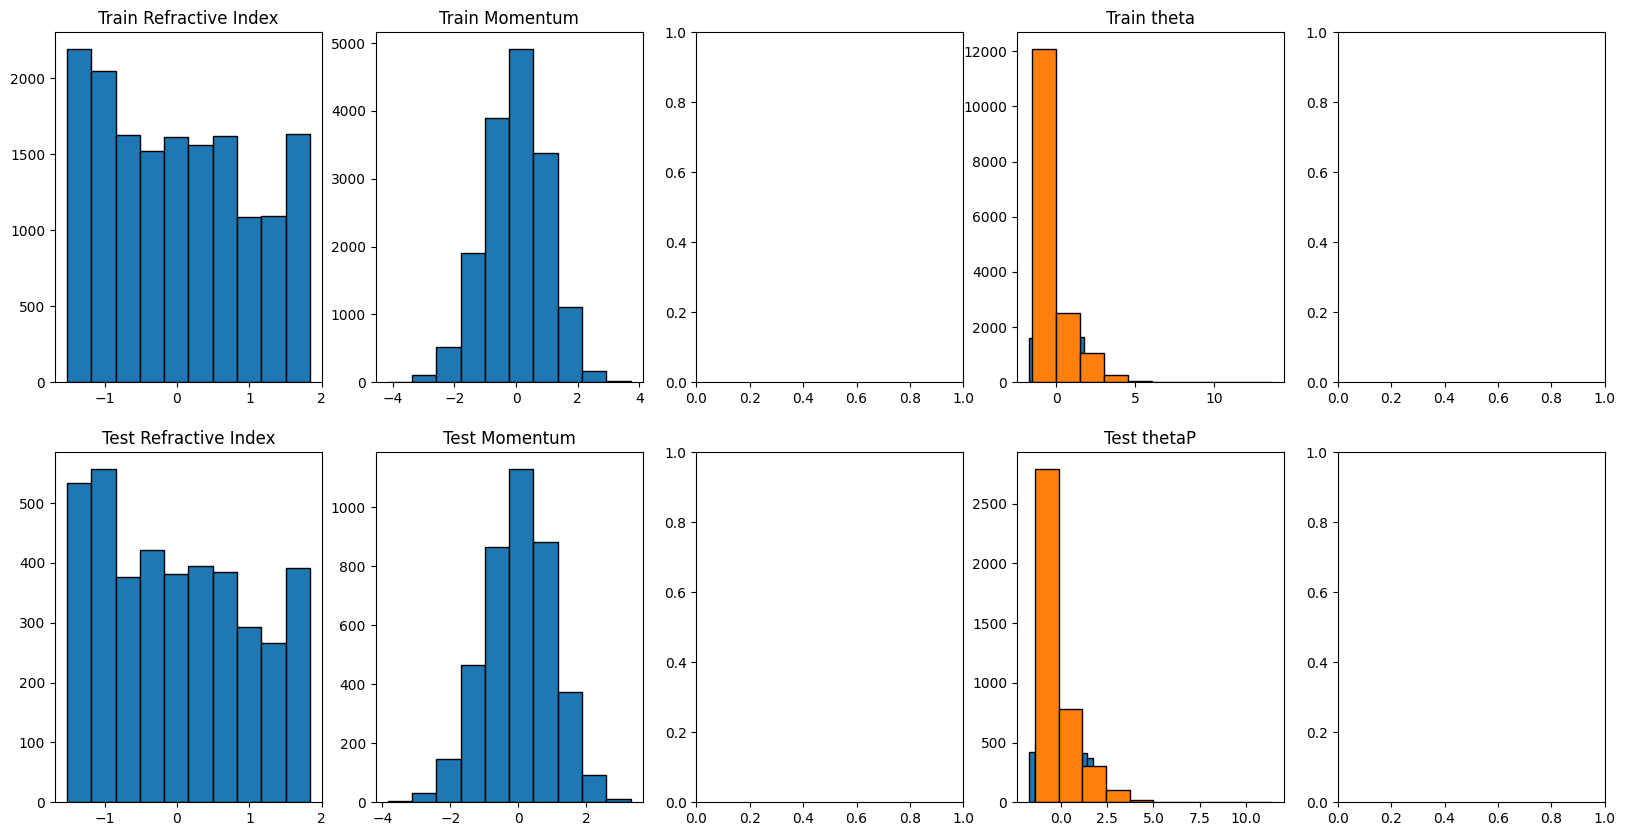

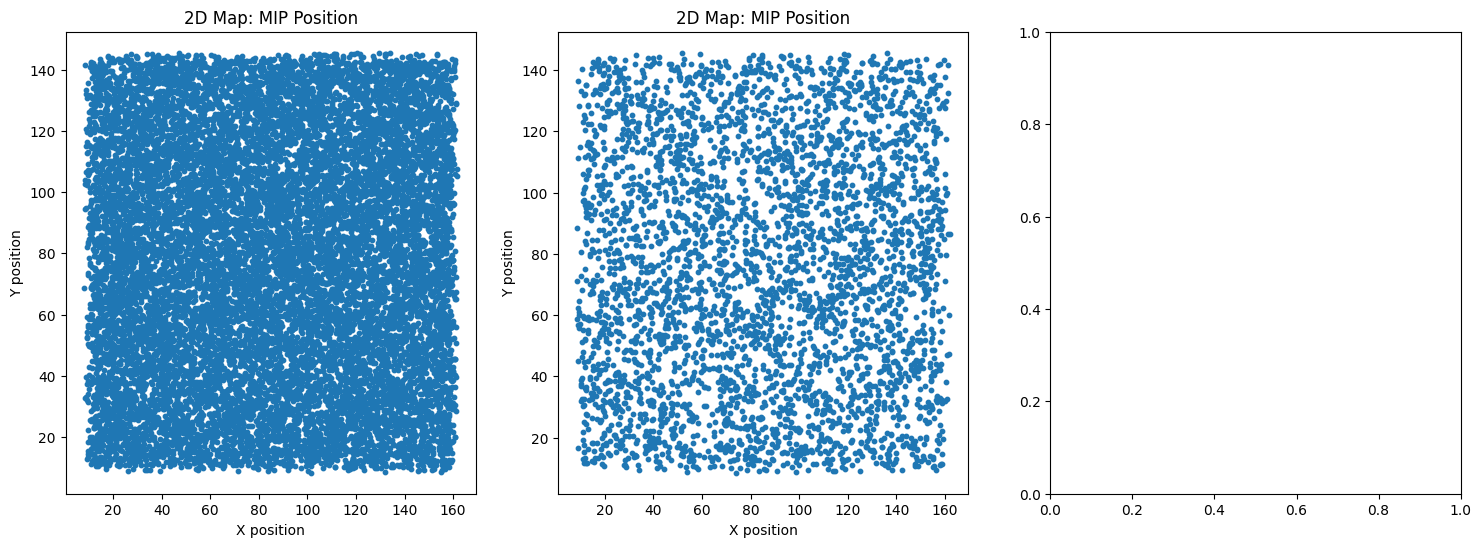

In [21]:
classifier.plot_hist(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)



# Training the model


In [ ]:

mask = [1,1,1,1]
classifier.train(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, mask = mask)


Fields in the first vector of X_train:
X_train_pion_candidates shape: (16000, 704, 2)
X_train_kaon_candidates shape: (16000, 704, 2)
X_train_proton_candidates shape: (16000, 704, 2)
X_train_momentum shape: (16000, 1)
X_train_refractive_index shape: (16000, 1)
X_train_phi shape: (16000, 1)
X_train_theta shape: (16000, 1)
X_train_energy shape: (16000, 1)
X_train_mip_position shape: (16000, 2)
X_train_rad_position shape: (16000, 2)

Fields in the first vector of X_test:
X_test_pion_candidates shape: (4000, 704, 2)
X_test_kaon_candidates shape: (4000, 704, 2)
X_test_proton_candidates shape: (4000, 704, 2)
X_test_momentum shape: (4000, 1)
X_test_refractive_index shape: (4000, 1)
X_test_phi shape: (4000, 1)
X_test_theta shape: (4000, 1)
X_test_energy shape: (4000, 1)
X_test_mip_position shape: (4000, 2)
X_test_rad_position shape: (4000, 2)
l1l2_weights_mip shape (1, 10, 3)
mapplying inputs
input1 = KerasTensor(type_spec=TensorSpec(shape=(None, 704, 2), dtype=tf.float32, name=None), name='mas

In [ ]:
!wget https://raw.githubusercontent.com/eflatlan/CNN_PID/models_sacved/helper_functions.py
from helper_functions import *

In [ ]:
!wget https://raw.githubusercontent.com/eflatlan/CNN_PID/models_sacved/plot_helper_functions.py
from plot_helper_functions import *